In [2]:
import pandas as pd
pd.options.display.max_rows = 20
%matplotlib inline

# Kvaliteta prejetega sadja

V projektni nalogi se ukvarjam z analizo kvalitete prejetega sadja v hladilnico Evrosad Krško od zunanjih partnerjev v letih 2014 in 2015. Analiza je razdeljena na tri poglavja, in sicer po kvaliteti sadja (1. kvaliteta ali industrija), po sortah in po dobaviteljih. Vmes med seboj primerjam rezultate v letu 2014 in 2015.

Najprej uvozim tabelo, ki vsebuje naslednje stolpce: datum, dobavitelj, sorta, kvaliteta in količina v kg. Nek dobavitelj torej v hladilnico večkrat na leto pripelje neko količino jabolk določene sorte in kvalitete.

In [3]:
kvaliteta = pd.read_csv('podatki.csv', sep=';', parse_dates=['Datum'])

In [8]:
kvaliteta

,Datum,Dobavitelj,Sorta,Kvaliteta,Količina [kg]
0,2014-07-14,Kodrič Milena,Redhaven,I.,820
1,2014-07-15,Kodrič Milena,Redhaven,I.,659
2,2014-07-16,Kodrič Milena,Redhaven,I.,1073
3,2014-07-17,Kodrič Milena,Redhaven,I.,1364
4,2014-07-18,Kodrič Milena,Redhaven,I.,1135
5,2014-07-21,Kodrič Milena,Redhaven,I.,1342
6,2014-07-22,Kodrič Milena,Redhaven,I.,924
7,2014-07-24,Kodrič Milena,Redhaven,I.,1035
8,2014-07-30,Levak Andrej,James Grieve,I.,1453
9,2014-06-08,BIF-VORPO,Viljamovka,I.,21789


# 1 Analiza po kvaliteti sadja

Zanima me razmerje med prejetimi jabolkami 1. kvalitete in industrije skupno ter po letih. Zanima me tudi, kateri dobavitelji pripeljejo največ jabolk 1. kvalitete.

In [65]:
količina_po_letih = kvaliteta.groupby(kvaliteta['Datum'].dt.year).sum()
količina_po_letih = količina_po_letih.rename_axis('Leto')
količina_po_letih

,Količina [kg]
Leto,
2014,3719633
2015,5026230


array([<matplotlib.axes._subplots.AxesSubplot object at 0x04EDDE50>], dtype=object)

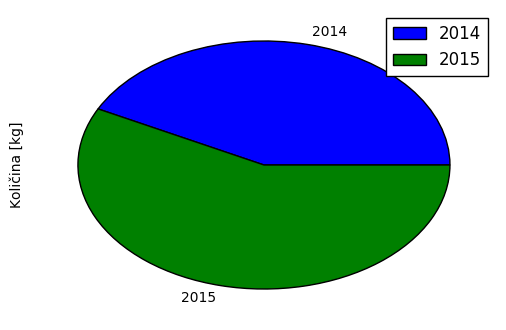

In [66]:
količina_po_letih.plot(kind='pie', subplots=True)

Na splošno vidim, da je bilo leta 2015 pripeljanih več jabolk kot leta 2014. Razlog so vremenske razmere, ki so vplivale na uspešnost pridelave jabolk.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x050CA030>], dtype=object)

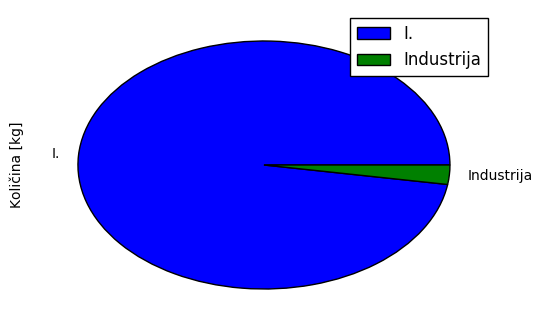

In [67]:
skupna_količina_po_kvaliteti = kvaliteta.groupby('Kvaliteta').sum()
skupna_količina_po_kvaliteti.plot(kind='pie', subplots='True')

Na splošno je v hladilnico pripeljanih veliko več jabolk 1. kvalitete kot pa industrije. Podjetje svojim zunanjim partnerjem za industrijo plačuje izredno nizko ceno, zato jim dovoljujejo, da določen procent jabolk 

In [62]:
kvaliteta['Datum'] = pd.to_datetime(kvaliteta['Datum'])
kvaliteta_2014 = kvaliteta[kvaliteta['Datum'].dt.year == 2014]

In [63]:
kvaliteta_2015 = kvaliteta[kvaliteta['Datum'].dt.year == 2015]

In [302]:
količina_po_kvaliteti = kvaliteta.groupby([kvaliteta['Datum'].dt.year, kvaliteta['Kvaliteta']]).sum()
količina_po_kvaliteti = količina_po_kvaliteti.rename_axis(['Leto', 'Kvaliteta'])
količina_po_kvaliteti

Količina [kg]
Leto Kvaliteta                
2014 I.                3687052
     Industrija          32581
2015 I.                4839207
     Industrija         187023

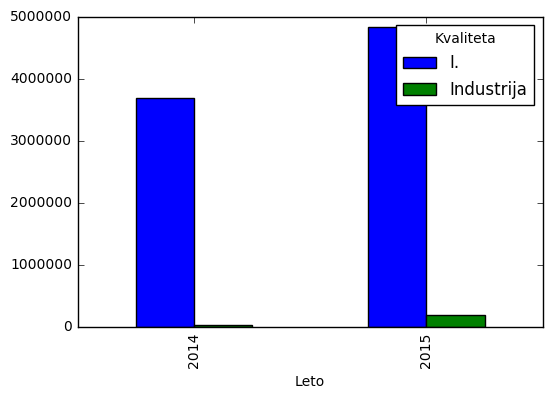

In [303]:
količina_po_kvaliteti.unstack().plot(kind='bar', y='Količina [kg]')

# 2 Analiza po dobaviteljih 

In [119]:
količina_na_dobavitelja = kvaliteta.groupby('Dobavitelj').aggregate(sum).sort_values('Količina [kg]', ascending = False)[:10]

In [115]:
količina_na_dobavitelja

,Količina [kg]
Dobavitelj,
Univerza MB,2058909
VRTOVI VOČA,1020052
Levak Andrej,998190
Šušterič Vojko,816309
Molan Mitja,476179
Lah Leon,404444
Martini Rene,280355
Mlakar Branko,263371
Novak Ludvik,261215


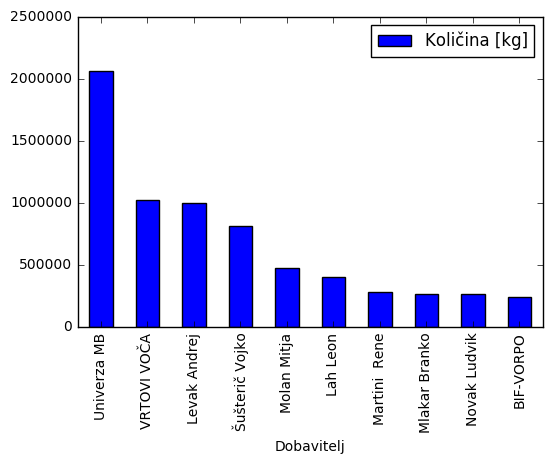

In [289]:
količina_na_dobavitelja.plot(kind='bar', y='Količina [kg]')

In [121]:
količina_na_dobavitelja_index = količina_na_dobavitelja.reset_index()
količina_na_dobavitelja_index

,Dobavitelj,Količina [kg]
0,Univerza MB,2058909
1,VRTOVI VOČA,1020052
2,Levak Andrej,998190
3,Šušterič Vojko,816309
4,Molan Mitja,476179
5,Lah Leon,404444
6,Martini Rene,280355
7,Mlakar Branko,263371
8,Novak Ludvik,261215
9,BIF-VORPO,241504


In [123]:
prva_kvaliteta = kvaliteta[kvaliteta['Kvaliteta'] == 'I.']
dobavitelji_prva = prva_kvaliteta.groupby('Dobavitelj').sum().sort_values('Količina [kg]', ascending = False)[:10]
dobavitelji_prva_index = dobavitelji_prva.reset_index()
dobavitelji_prva_index

,Dobavitelj,Količina [kg]
0,Univerza MB,2058909
1,VRTOVI VOČA,1020052
2,Levak Andrej,927314
3,Šušterič Vojko,816309
4,Molan Mitja,462963
5,Lah Leon,404444
6,Martini Rene,280355
7,Novak Ludvik,261215
8,Mlakar Branko,261103
9,BIF-VORPO,241504


In [124]:
pd.merge(količina_na_dobavitelja_index, dobavitelji_prva_index)

,Dobavitelj,Količina [kg]
0,Univerza MB,2058909
1,VRTOVI VOČA,1020052
2,Šušterič Vojko,816309
3,Lah Leon,404444
4,Martini Rene,280355
5,Novak Ludvik,261215
6,BIF-VORPO,241504


Vidimo, da so največji dobavitelji pripeljali skoraj samo jabolka 1. kvalitete. Podjetje namreč industrijo plačuje zelo slabo in dovoljuje proizvajalcem, da določen procent industrije prodajo sami kam drugam, zato sem pripeljejo le najlepša jabolka.

In [54]:
univerza_mb = kvaliteta.groupby(['Dobavitelj']).get_group('Univerza MB').groupby('Sorta').sum().sort_values('Količina [kg]')
univerza_mb

,Količina [kg]
Sorta,
Eko Topaz,22043
Elstar,25192
Gala Must,29543
Eko Opal,46669
Gala,49468
Braeburn,65626
Fuji,79252
Jonagold,81029
Idared,147204


array([<matplotlib.axes._subplots.AxesSubplot object at 0x04EED3D0>], dtype=object)

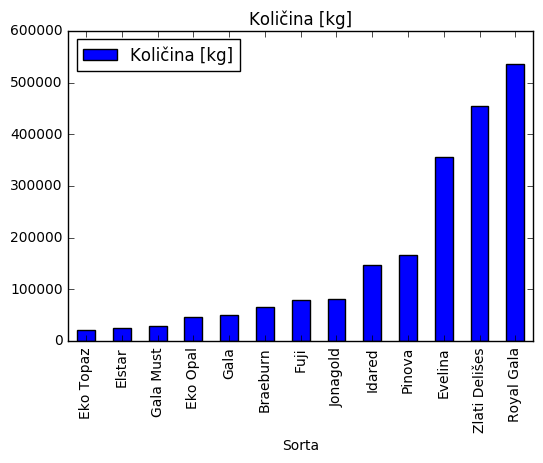

In [60]:
univerza_mb.plot(kind='bar', subplots=True)

In [119]:
dobavitelj = kvaliteta.groupby(['Dobavitelj', 'Sorta']).size().unstack()
dobavitelj

Sorta,Abate fetel,Braeburn,Delcorf,Eko Opal,Eko Topaz,Elstar,Evelina,Fuji,Gala,Gala Must,...,Idared,James Grieve,Jonagold,Opal,Pinova,Redhaven,Royal Gala,Topaz,Viljamovka,Zlati Delišes
Dobavitelj,,,,,,,,,,,,,,,,,,,,,
AA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
AA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
AA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
AA4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
AA5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
AA6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
AA7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
AA8,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
dobavitelj1 = pd.DataFrame(dobavitelj.isnull().sum(axis=1))
dobavitelj1.columns = ['število']
dobavitelj1

,število
Dobavitelj,
AA1,20
AA2,20
AA3,20
AA4,20
AA5,20
AA6,20
AA7,20
AA8,20
AA9,20


In [121]:
št_sort = pd.DataFrame(kvaliteta.groupby('Sorta').size().reset_index())
št_sort

,Sorta,0
0,Abate fetel,7
1,Braeburn,92
2,Delcorf,2
3,Eko Opal,11
4,Eko Topaz,7
5,Elstar,24
6,Evelina,84
7,Fuji,40
8,Gala,32
9,Gala Must,26


In [122]:
dobavitelj1['0'] = 21 - dobavitelj1['število']
dobavitelj2 = pd.DataFrame(dobavitelj1['0'].sort_values())
dobavitelj2.columns = ['število sort na dobavitelja']
dobavitelj2

,število sort na dobavitelja
Dobavitelj,
AA1,1
Rojc,1
Robek Boštjan,1
Ratajc Jože,1
Petan Marija,1
Umek Jožefa,1
Martini Rene,1
Tonjko Stanislav,1
Kovačič Alojz,1


# 3 Analiza po sortah

In [277]:
količina_po_sortah = kvaliteta.groupby(['Sorta']).aggregate(sum).sort_values('Količina [kg]', ascending=False)[:10].reset_index()
količina_po_sortah

,Sorta,Količina [kg]
0,Zlati Delišes,1961001
1,Royal Gala,1859515
2,Idared,1036789
3,Evelina,908451
4,Braeburn,867193
5,Granny Smith,508345
6,Jonagold,405566
7,Pinova,251666
8,Fuji,248083
9,Viljamovka,201687


Zdaj 10 skupno količinsko najbolj zastopanih sort analizirajmo po letih.

In [282]:
top_sorte = pd.DataFrame(količina_po_sortah['Sorta'])
top_sorte
tabela_le_top_sorte = pd.merge(kvaliteta, top_sorte)
tabela_top_sort = tabela_le_top_sorte.set_index('Datum')
tabela_top_sort

,Dobavitelj,Sorta,Kvaliteta,Količina [kg]
Datum,,,,
2014-06-08,BIF-VORPO,Viljamovka,I.,21789
2014-08-08,Umek Jožefa,Viljamovka,Industrija,7680
2014-08-08,BIF-VORPO,Viljamovka,I.,18540
2014-08-08,BIF-VORPO,Viljamovka,I.,4099
2014-11-08,Umek Jožefa,Viljamovka,Industrija,9627
2014-11-08,BIF-VORPO,Viljamovka,I.,21457
2014-08-13,Pinterič Antonija,Viljamovka,Industrija,2035
2014-08-13,BIF-VORPO,Viljamovka,I.,15947
2014-08-14,Kovačič Alojz,Viljamovka,Industrija,2005


In [283]:
tabela_top_sort.loc[:, 'Leto'] = tabela_top_sort.index.year
tabela_top_sort

,Dobavitelj,Sorta,Kvaliteta,Količina [kg],Leto
Datum,,,,,
2014-06-08,BIF-VORPO,Viljamovka,I.,21789,2014
2014-08-08,Umek Jožefa,Viljamovka,Industrija,7680,2014
2014-08-08,BIF-VORPO,Viljamovka,I.,18540,2014
2014-08-08,BIF-VORPO,Viljamovka,I.,4099,2014
2014-11-08,Umek Jožefa,Viljamovka,Industrija,9627,2014
2014-11-08,BIF-VORPO,Viljamovka,I.,21457,2014
2014-08-13,Pinterič Antonija,Viljamovka,Industrija,2035,2014
2014-08-13,BIF-VORPO,Viljamovka,I.,15947,2014
2014-08-14,Kovačič Alojz,Viljamovka,Industrija,2005,2014


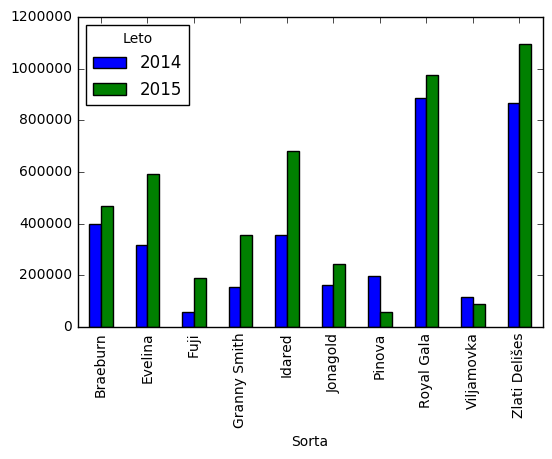

In [308]:
tabela_top_sort.groupby(['Sorta', 'Leto']).sum().unstack().plot(kind='bar', y ='Količina [kg]')

In [104]:
sorte = kvaliteta.groupby(['Sorta', 'Dobavitelj']).size().unstack()
sorte

Dobavitelj,AA1,AA2,AA3,AA4,AA5,AA6,AA7,AA8,AA9,Andrej Rojc,...,Rupar Bojan,Tonjko Stanislav,Umek Jože,Umek Jožefa,Univerza MB,Uplaznik Marjan,VRTOVI VOČA,Zagorc Ema,Šušterič Vojko,Žganec Robert
Sorta,,,,,,,,,,,,,,,,,,,,,
Abate fetel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Braeburn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,14.0,4.0,NaN,NaN,10.0,NaN
Delcorf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eko Opal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
Eko Topaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
Elstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,2.0
Evelina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,24.0,NaN
Fuji,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.0,6.0,1.0,NaN,3.0,NaN
Gala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,1.0


In [123]:
sorte1 = pd.DataFrame(sorte.isnull().sum(axis=1))
sorte1.columns = ['število']
sorte1

,število
Sorta,
Abate fetel,48
Braeburn,40
Delcorf,49
Eko Opal,49
Eko Topaz,49
Elstar,46
Evelina,45
Fuji,43
Gala,44


In [124]:
št_dobaviteljev = pd.DataFrame(kvaliteta.groupby('Dobavitelj').size().reset_index())
št_dobaviteljev

,Dobavitelj,0
0,AA1,2
1,AA2,2
2,AA3,2
3,AA4,4
4,AA5,1
5,AA6,3
6,AA7,1
7,AA8,2
8,AA9,1
9,Andrej Rojc,1


In [125]:
sorte1['0'] = 50 - sorte1['število']
sorte2 = pd.DataFrame(sorte1['0'].sort_values())
sorte2.columns = ['število dobaviteljev na sorto']
sorte2

,število dobaviteljev na sorto
Sorta,
Topaz,1
Delcorf,1
Eko Opal,1
Eko Topaz,1
Redhaven,1
Opal,1
James Grieve,1
Abate fetel,2
Elstar,4
